<a href="https://colab.research.google.com/github/hannape/Gruba-kreska/blob/main/Main_wczytanie_reprezentacje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Main. Zebranie wszystkich eksperymentów rozsianych po poprzednich roboczych 
notatnikach, wczytanie i instalowanie bibliotek, wczytanie parametrów (też powinny byc w jakiejś osobnej funkcji config.py pewnie?), wywołanie obu funkcji:
* **funkcja_wczytanie_danych** - wczytanie danych dla wszystkich 4 zbiorów (wczytuje wszystkie zbiory, train, valid, test_old, test_new). Zajmuje to z 6 minut.
* **funkcja_reprezentacje** - wyliczenie jednej z pięciu reprezentacji dla wybranego zbioru danych (jedna z trzech reprezentacji 2d: spektrogram, mel-spektrogram, multitaper, albo jedna z 2 reprezentacji 1d: zestaw 8_classic lub 8_classic_plus_MIR, przebiegi podsumowane 1-4 miarami stat (min, max, av, std) )


In [1]:
# Wczytywanie google drive'a
from google.colab import drive
drive.mount('/content/drive')
from __future__ import print_function

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Parametry które będą wchodzić do funkcja_wczytanie_danych

path_test1618_txt = 'drive/My Drive/poprawione etykiety 24112020/testowe/'
path_train161718_txt =  'drive/My Drive/poprawione etykiety 24112020/treningowe/'
path_test1618_wav = 'drive/My Drive/testowe_1618/'
path_train161718_wav =  'drive/My Drive/treningowe94_161718/'
  
balance_types = ['full_rec','balanced', 'valid' ]  # na potrzeby testu, treningu, valida
balance_ratios = [None, [50, 25], [400, 100]]   # [minimalna liczba negatywnych na nagranie (hasnoisy blus randomy) ,minimalna liczba randomów na nagranie]
chunk_length_ms = 500 # 500 ms
chunk_overlap = 150 # 150 ms
calls_0 = ['t', 'g', 'czapla', 'gh', 'puszczyk']                                    # etykiety które są negatywne
calls_1 = ['d', 'd?', 'k', 'k?', 'kwiczol', 'r','r?', 's', 's?', 'skowronek', 'ni'] # calls of interest
calls_unknown = ['???','??? mysz', '??? high freq']                                 # unknown, nie wiem czy to głos czy nie, więc będę wyrzucać te chunksy to zawierające
tolerance = 0.004                                                                   # jaka tolerancja, w sek (jeśli mniej niż ta wartość znajdzie się w chunksie, to uznajemy że głosu tam nie ma)
valid_set = ['9niski_szum_BUK4_20161025_000604', 'BUK5_20180930_000704', 'BUK4_20161024_223604', 'BUK4_20171001_020404a', 'BUK1_20160914_011604', 'BUK5_20170910_025605', 'BUK4_20161013_200104', 'BUK5_20181003_235705']
test_rec_to_cut = ['BUK5_20161101_002104a', 'BUK5_20161101_002104b']                # nagrania do wyrzucenia ze starego zbioru testowego
columns_dataframe = ['chunk_ids', 'chunk_start', 'chunk_end', 'has_bird', 'chunks_species', 'call_id', 'has_unknown', 'has_noise'] # dataframe z opisem chunksów w nagraniu. 
                                                                                                                    # po funkcji wczytaj - wszystkie chunksy ever w nagraniu,
                                                                                                                    # po funkcji reprezentacja - tylko te chunksy wybrane (czyli pobalansowane w validzie i trainie, usuniete te niepewne z testa(?))

In [3]:
# Wczytanie funkcja_wczytanie_danych.py z dysku
! cp "drive/My Drive/Colab Notebooks/funkcja_wczytanie_danych.py" .
from funkcja_wczytanie_danych import funkcja_wczytanie_danych

In [4]:
# każdy z tych 4 wyjść jest tablicą [file_names_X_set, ind_for_X_set, result_dataframe_X]
# wczytywanie wszystkiego: train, valid, test old, test new
import time
start_time = time.time()

data_train, data_valid, data_test_old, data_test_new, = funkcja_wczytanie_danych(path_test1618_txt, path_train161718_txt, path_test1618_wav,\
                                                                                 path_train161718_wav, balance_types, balance_ratios, chunk_length_ms,\
                                                                                 chunk_overlap, calls_0, calls_1, calls_unknown, tolerance, valid_set,\
                                                                                 test_rec_to_cut, columns_dataframe)
print("--- Funkcja wczytanie danych: %s sekund ---" % (time.time() - start_time))

*************  Train  ***********
------------Analiza nagrania: 1swierszcze_nakladki_BUK4_20160925_204604.wav-----------
------------Analiza nagrania: 2koniec_swierszczy_BUK4_20160925_221604.wav-----------
------------Analiza nagrania: 3wzgledna_cisza_BUK4_20160925_224604.wav-----------
------------Analiza nagrania: 4szum_sredni_BUK4_20160918_013604.wav-----------
------------Analiza nagrania: 5szum_sredni_nakladki_BUK4_20161011_000804.wav-----------
------------Analiza nagrania: 6wichura_deszcz_BUK4_20161005_022304.wav-----------
------------Analiza nagrania: 7wiatr_BUK4_20161006_002104.wav-----------
------------Analiza nagrania: 8deszczk_bezptasio_BUK4_20161015_235704.wav-----------
------------Analiza nagrania: BUK4_20160918_223304.wav-----------
------------Analiza nagrania: BUK4_20160919_013304.wav-----------
------------Analiza nagrania: BUK4_20160925_191604.wav-----------
------------Analiza nagrania: BUK4_20160925_194604.wav-----------
------------Analiza nagrania: BUK4_201609

In [5]:
representation_1d = ['8_classic', '8_classic_plus_MIR'];
representation_2d = ['spektrogram' , 'mel-spektrogram', 'multitaper']

# Parametry które będą wchodzić do funkcja_reprezentacje. Wchodzi wszystko, choć pewnie by nie musiało, tylko w zależności od wybranej reprezentacji
repr_1d_summary = ['min', 'max', 'mean', 'std']
summary_1d = [1,1,1,1]

# jeśli spektrogram lub mel-spektrogram
sr = 44100 # sampling ratio, częstotliwość próbkowania nagrania. moje zawsze mają tyle (chyba że by grzebać w niemoich nagraniach 2013-2015, które miały za niskie sr, nawet 16k)
n_fft=512         # ilopunktowa analiza FFT
win_length=512    # wielkość okna
hop_length= 150   # długość skoku
window = "hann"   # rodzaj okna
f_min = 4000      # częstotliwość minimalna reprezentacji 
f_max = 9500      # częstotliwość maksymalna reprezentacji 

# jeśli jest to mel-spektrogram:
n_mels = 60     # liczba filtrów w paśmie melowym - a tak konkretnie to chyba w tym zakresie częstotliwości

# jeśli to ta reprezentacja multitaperopodobna
N = 512 
step = 145
Np = 490 
K = 2             # ilość taperów (nie może być za duża wartość, bo ciche głosy znikną, zostaną uśrednione)
tm = 1 
flock =0.1 
tlock = 10

In [6]:
# jakieś biblioteki do zainstalowania, w sumie nie wiem czy wszystkie ostatecznie potrzebne
!pip install audiosegment
!pip install librosa
!pip install pydub
!pip install webrtcvad
!pip install -q spectrum
!pip install pkgconfig==1.5.1 
!pip install Cython==0.29.21
!pip install libtfr==2.0.2

In [7]:
# Wczytanie funkcja_reprezentacje.py z dysku

! cp "drive/My Drive/Colab Notebooks/funkcja_reprezentacje.py" .
from funkcja_reprezentacje import funkcja_reprezentacje

In [ ]:
import numpy as np
import time

start_time = time.time()
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
file_names, indices, info_chunksy, representation_type, repr_full = funkcja_reprezentacje(path_train161718_wav, data_valid, '8_classic_plus_MIR', repr_1d_summary, summary_1d, sr, chunk_length_ms, \
                          n_fft, win_length, hop_length, window, f_min, f_max, n_mels, N, step, Np, K, tm, flock, tlock)

print("--- Funkcja reprezentacja danych: %s sekund dla %s ---" % (time.time() - start_time, representation_type))

ile nagrań w secie:  8
Dla przykładowego nagrania, które jest 5 w secie:
BUK5_20170910_025605.wav
liczba wybranych chunków: 123 , w tym 3 z głosami, 20 z trzaskami , reszta to losowo wybrane chunksy negatywne (bez ptaków)
rodzaj reprezentacji: spektrogram
rozmiar macierzy z reprezentacją: (123, 63, 148)
etykiety do wszystkich chunksów: [['t'], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], [], [], [], [], ['t'], [], [], ['s'], ['t'], [], [], [], [], [], [], [], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], ['t'], [], [], [], [], ['t'], ['t'], [], [], [], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], ['t'], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Czy chunks nr 24 has_bird?  1
występujący tu gatunek:  ['s']


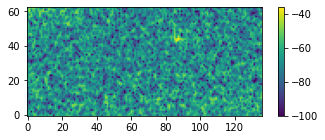

In [54]:
# sprawdzenie reprezentacji 1
import matplotlib.pyplot as plt

print('ile nagrań w secie: ', np.shape(file_names)[0])
nagr = 5
chunks = 24
print('Dla przykładowego nagrania, które jest', nagr, 'w secie:' )
print(file_names[nagr])
print('liczba wybranych chunków:', np.shape(indices[nagr])[0], ', w tym', sum(info_chunksy[nagr][3]),'z głosami,', sum(info_chunksy[nagr][7]), 'z trzaskami', ', reszta to losowo wybrane chunksy negatywne (bez ptaków)')
print('rodzaj reprezentacji:', representation_type)
print('rozmiar macierzy z reprezentacją:',np.shape(repr_full[nagr]))
print('etykiety do wszystkich chunksów:',info_chunksy[nagr][4]) 
print('Czy chunks nr', chunks,'has_bird? ',info_chunksy[nagr][3][chunks])
if (info_chunksy[nagr][3][chunks]):
  print('występujący tu gatunek: ',info_chunksy[nagr][4][chunks])
plt.figure(figsize=(6,2))
plt.imshow(np.array(repr_full[nagr][chunks])[:,9:-3])
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

ile nagrań w secie:  8
Dla przykładowego nagrania, które jest 5 w secie:
BUK5_20170910_025605.wav
liczba wybranych chunków: 123 , w tym 3 z głosami, 20 z trzaskami , reszta to losowo wybrane chunksy negatywne (bez ptaków)
rodzaj reprezentacji: mel-spektrogram
rozmiar macierzy z reprezentacją: (123, 60, 148)
etykiety do wszystkich chunksów: [['t'], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], [], [], [], [], ['t'], [], [], ['s'], ['t'], [], [], [], [], [], [], [], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], ['t'], [], [], [], [], ['t'], ['t'], [], [], [], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], ['t'], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Czy chunks nr 24 has_bird?  1
występujący tu gatunek:  ['s']


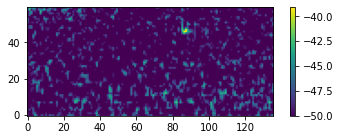

In [52]:
# sprawdzenie reprezentacji 2
import matplotlib.pyplot as plt

print('ile nagrań w secie: ', np.shape(file_names)[0])
nagr = 5
chunks = 24
print('Dla przykładowego nagrania, które jest', nagr, 'w secie:' )
print(file_names[nagr])
print('liczba wybranych chunków:', np.shape(indices[nagr])[0], ', w tym', sum(info_chunksy[nagr][3]),'z głosami,', sum(info_chunksy[nagr][7]), 'z trzaskami', ', reszta to losowo wybrane chunksy negatywne (bez ptaków)')
print('rodzaj reprezentacji:', representation_type)
print('rozmiar macierzy z reprezentacją:',np.shape(repr_full[nagr]))
print('etykiety do wszystkich chunksów:',info_chunksy[nagr][4]) 
print('Czy chunks nr', chunks,'has_bird? ',info_chunksy[nagr][3][chunks])
if (info_chunksy[nagr][3][chunks]):
  print('występujący tu gatunek: ',info_chunksy[nagr][4][chunks])
plt.figure(figsize=(6,2))
plt.imshow(np.array(repr_full[nagr][chunks])[:,9:-3])
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

ile nagrań w secie:  8
Dla przykładowego nagrania, które jest 5 w secie:
BUK5_20170910_025605.wav
liczba wybranych chunków: 123 , w tym 3 z głosami, 20 z trzaskami , reszta to losowo wybrane chunksy negatywne (bez ptaków)
rodzaj reprezentacji: multitaper
rozmiar macierzy z reprezentacją: (123, 64, 149)
etykiety do wszystkich chunksów: [['t'], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], [], [], [], [], ['t'], [], [], ['s'], ['t'], [], [], [], [], [], [], [], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], ['t'], [], [], [], [], ['t'], ['t'], [], [], [], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], ['t'], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Czy chunks nr 24 has_bird?  1
występujący tu gatunek:  ['s']


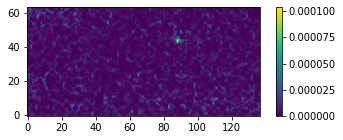

In [56]:
# sprawdzenie reprezentacji 3
import matplotlib.pyplot as plt

print('ile nagrań w secie: ', np.shape(file_names)[0])
nagr = 5
chunks = 24
print('Dla przykładowego nagrania, które jest', nagr, 'w secie:' )
print(file_names[nagr])
print('liczba wybranych chunków:', np.shape(indices[nagr])[0], ', w tym', sum(info_chunksy[nagr][3]),'z głosami,', sum(info_chunksy[nagr][7]), 'z trzaskami', ', reszta to losowo wybrane chunksy negatywne (bez ptaków)')
print('rodzaj reprezentacji:', representation_type)
print('rozmiar macierzy z reprezentacją:',np.shape(repr_full[nagr]))
print('etykiety do wszystkich chunksów:',info_chunksy[nagr][4]) 
print('Czy chunks nr', chunks,'has_bird? ',info_chunksy[nagr][3][chunks])
if (info_chunksy[nagr][3][chunks]):
  print('występujący tu gatunek: ',info_chunksy[nagr][4][chunks])
plt.figure(figsize=(6,2))
plt.imshow(np.array(repr_full[nagr][chunks])[:,9:-3])
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

ile nagrań w secie:  8
Dla przykładowego nagrania, które jest 5 w secie:
BUK5_20170910_025605.wav
liczba wybranych chunków: 123 , w tym 3 z głosami, 20 z trzaskami , reszta to losowo wybrane chunksy negatywne (bez ptaków)
rodzaj reprezentacji: 8_classic
rozmiar macierzy z reprezentacją: (123, 4, 8)
etykiety do wszystkich chunksów: [['t'], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], [], [], [], [], ['t'], [], [], ['s'], ['t'], [], [], [], [], [], [], [], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], ['t'], [], [], [], [], ['t'], ['t'], [], [], [], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], ['t'], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Czy chunks nr 24 has_bird?  1
występujący tu gatunek:  ['s']


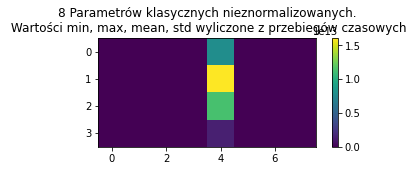

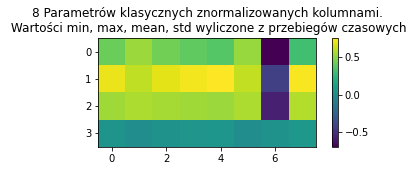

In [68]:
# sprawdzenie reprezentacji 4 - mało użyteczna wizualizacja przez to że różne
import matplotlib.pyplot as plt

print('ile nagrań w secie: ', np.shape(file_names)[0])
nagr = 5
chunks = 24
print('Dla przykładowego nagrania, które jest', nagr, 'w secie:' )
print(file_names[nagr])
print('liczba wybranych chunków:', np.shape(indices[nagr])[0], ', w tym', sum(info_chunksy[nagr][3]),'z głosami,', sum(info_chunksy[nagr][7]), 'z trzaskami', ', reszta to losowo wybrane chunksy negatywne (bez ptaków)')
print('rodzaj reprezentacji:', representation_type)
print('rozmiar macierzy z reprezentacją:',np.shape(repr_full[nagr]))
print('etykiety do wszystkich chunksów:',info_chunksy[nagr][4]) 
print('Czy chunks nr', chunks,'has_bird? ',info_chunksy[nagr][3][chunks])
if (info_chunksy[nagr][3][chunks]):
  print('występujący tu gatunek: ',info_chunksy[nagr][4][chunks])
plt.figure(figsize=(6,2))
plt.imshow(np.array(repr_full[nagr][chunks]))
plt.title('8 Parametrów klasycznych nieznormalizowanych.\n Wartości min, max, mean, std wyliczone z przebiegów czasowych')
plt.colorbar()
plt.show()

from sklearn import preprocessing
plt.figure(figsize=(6,2))
plt.imshow(preprocessing.normalize(np.array(repr_full[nagr][chunks]), axis=0))
plt.title('8 Parametrów klasycznych znormalizowanych kolumnami.\n Wartości min, max, mean, std wyliczone z przebiegów czasowych')
plt.colorbar()
plt.show()

ile nagrań w secie:  8
Dla przykładowego nagrania, które jest 5 w secie:
BUK5_20170910_025605.wav
liczba wybranych chunków: 123 , w tym 3 z głosami, 20 z trzaskami , reszta to losowo wybrane chunksy negatywne (bez ptaków)
rodzaj reprezentacji: 8_classic_plus_MIR
rozmiar macierzy z reprezentacją: (123, 4, 39)
etykiety do wszystkich chunksów: [['t'], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], [], [], [], [], ['t'], [], [], ['s'], ['t'], [], [], [], [], [], [], [], ['t'], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], ['t'], [], [], [], [], ['t'], ['t'], [], [], [], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['t'], ['t'], [], ['t'], ['t'], ['s'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Czy chunks nr 24 has_bird?  1
występujący tu gatunek:  ['s']


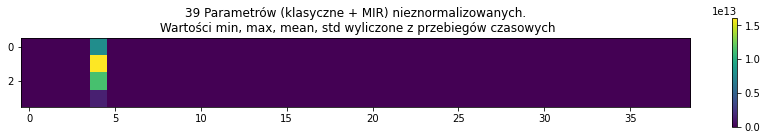

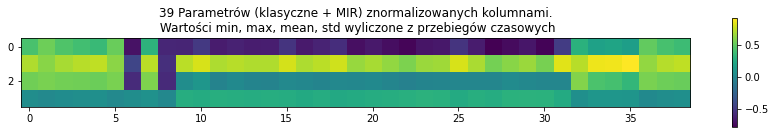

In [75]:
# sprawdzenie reprezentacji 5 - rozszerzonej reprezentacji 4
import matplotlib.pyplot as plt

print('ile nagrań w secie: ', np.shape(file_names)[0])
nagr = 5
chunks = 24
print('Dla przykładowego nagrania, które jest', nagr, 'w secie:' )
print(file_names[nagr])
print('liczba wybranych chunków:', np.shape(indices[nagr])[0], ', w tym', sum(info_chunksy[nagr][3]),'z głosami,', sum(info_chunksy[nagr][7]), 'z trzaskami', ', reszta to losowo wybrane chunksy negatywne (bez ptaków)')
print('rodzaj reprezentacji:', representation_type)
print('rozmiar macierzy z reprezentacją:',np.shape(repr_full[nagr]))
print('etykiety do wszystkich chunksów:',info_chunksy[nagr][4]) 
print('Czy chunks nr', chunks,'has_bird? ',info_chunksy[nagr][3][chunks])
if (info_chunksy[nagr][3][chunks]):
  print('występujący tu gatunek: ',info_chunksy[nagr][4][chunks])
plt.figure(figsize=(15,2))
plt.imshow(np.array(repr_full[nagr][chunks]))
plt.title('39 Parametrów (klasyczne + MIR) nieznormalizowanych.\n Wartości min, max, mean, std wyliczone z przebiegów czasowych')
plt.colorbar()
plt.show()

from sklearn import preprocessing
plt.figure(figsize=(15,2))
plt.imshow(preprocessing.normalize(np.array(repr_full[nagr][chunks]), axis=0))
plt.title('39 Parametrów (klasyczne + MIR) znormalizowanych kolumnami.\n Wartości min, max, mean, std wyliczone z przebiegów czasowych')
plt.colorbar()
plt.show()